In [1]:
import pandas as pd


In [47]:
df = pd.read_excel('Живонароджені.xlsx')

In [123]:
df.head()

,Регіон,Живонароджені
Рік,,
1989,Україна,690981
1990,Україна,657202
1991,Україна,630813
1992,Україна,596785
1993,Україна,557467


In [48]:
df['Живонароджені'] = df['Живонароджені'].str.replace(' ','').astype('int64')

In [18]:
import plotly.express as px

fig = px.line(df[df['Регіон']=='Україна'], x="Рік", y="Живонароджені", color="Регіон")
fig.show()

In [21]:
fig = px.line(df[df['Регіон']=='м. Київ'], x="Рік", y="Живонароджені", color="Регіон")
fig.show()

In [24]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import ARIMA, AutoARIMA



In [50]:
df.index = df['Рік']
df.drop('Рік',axis=1,inplace=True)

In [58]:
df_ukr = df[df['Регіон']=='м. Київ'].drop('Регіон',axis=1)

In [54]:
df_ukr.index = pd.to_datetime(df_ukr.index)

In [59]:
df_ukr.index

Int64Index([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
            2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='Рік')

In [65]:
datetime_series = pd.Series(
    pd.date_range("1989", periods = 32,freq="Y")
)

In [67]:
df_ukr.index = datetime_series

In [70]:
df_ukr = df_ukr.to_period(freq='Y')

In [71]:
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range('2020-12-31', periods=10, freq="Y")), is_relative=False
 )

C:\Users\olha.lukasevych\Anaconda3\lib\site-packages\pmdarima\arima\arima.py:577: UserWarning:

As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.



(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Живонароджені'>)

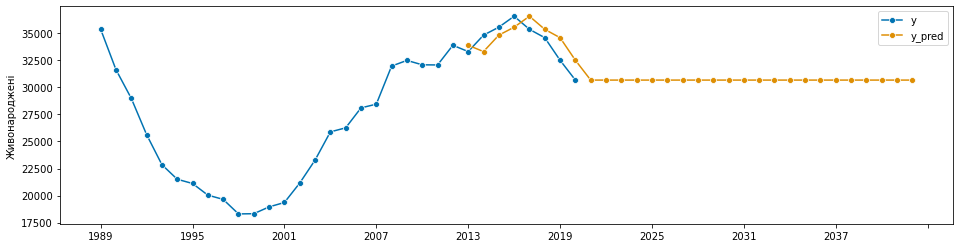

In [203]:
from sktime.forecasting.arima import AutoARIMA
from sktime.utils.plotting import plot_series
y=df_ukr['Живонароджені']
forecaster = AutoARIMA(sp=2, suppress_warnings=True)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["y", "y_pred"])

C:\Users\olha.lukasevych\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Живонароджені'>)

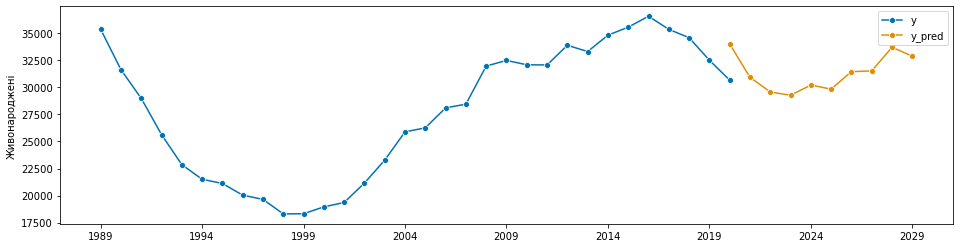

In [89]:
from sktime.forecasting.theta import ThetaForecaster
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["y", "y_pred"])


C:\Users\olha.lukasevych\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Живонароджені'>)

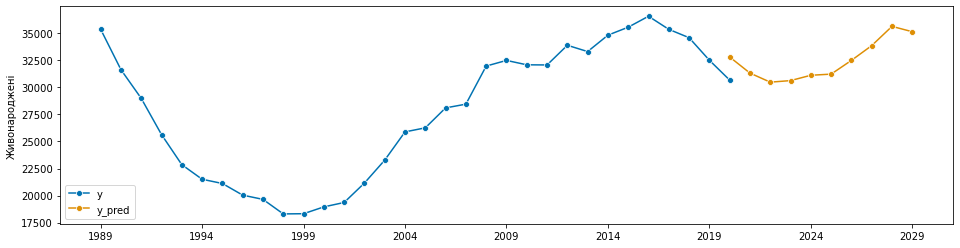

In [93]:

from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
forecaster.fit(y)
y_pred = forecaster.predict(fh)

plot_series(y, y_pred, labels=["y", "y_pred"])

C:\Users\olha.lukasevych\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Живонароджені'>)

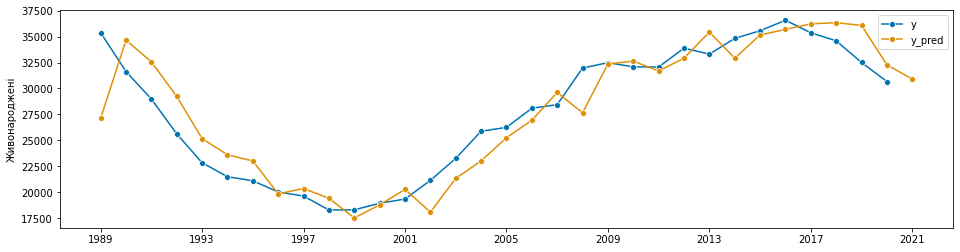

In [114]:

from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=6)
forecaster.fit(y)
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range('1989-12-31', periods=33, freq="Y")), is_relative=False
 )
y_pred = forecaster.predict(fh)

plot_series(y, y_pred, labels=["y", "y_pred"])

C:\Users\olha.lukasevych\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Живонароджені'>)

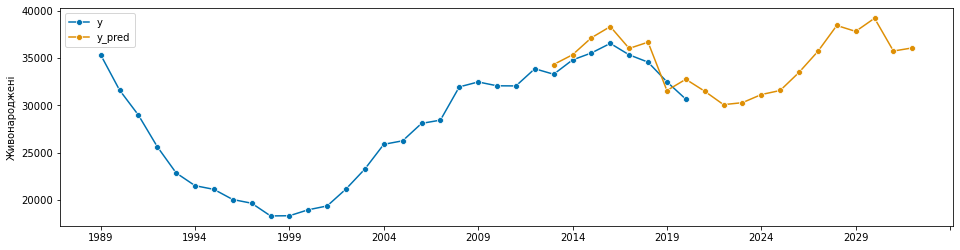

In [227]:

from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend="multiplicative", seasonal="multiplicative",sp=12)
forecaster.fit(y)
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range('2013-12-31', periods=20, freq="Y")), is_relative=False
 )
y_pred = forecaster.predict(fh)

plot_series(y, y_pred, labels=["y", "y_pred"])

C:\Users\olha.lukasevych\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Живонароджені'>)

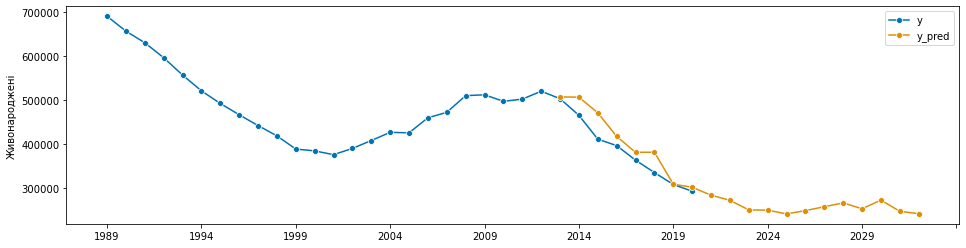

In [218]:
df_ua = df[df['Регіон']=='Україна'].drop('Регіон',axis=1)
datetime_series = pd.Series(
    pd.date_range("1989", periods = 32,freq="Y")
)
df_ua.index = datetime_series
df_ua = df_ua.to_period(freq='Y')
y_ua=df_ua['Живонароджені']
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend="multiplicative", seasonal="additive", sp=12)
forecaster.fit(y_ua)
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range('2013-12-31', periods=20, freq="Y")), is_relative=False
 )
y_pred = forecaster.predict(fh)

plot_series(y_ua, y_pred, labels=["y", "y_pred"])

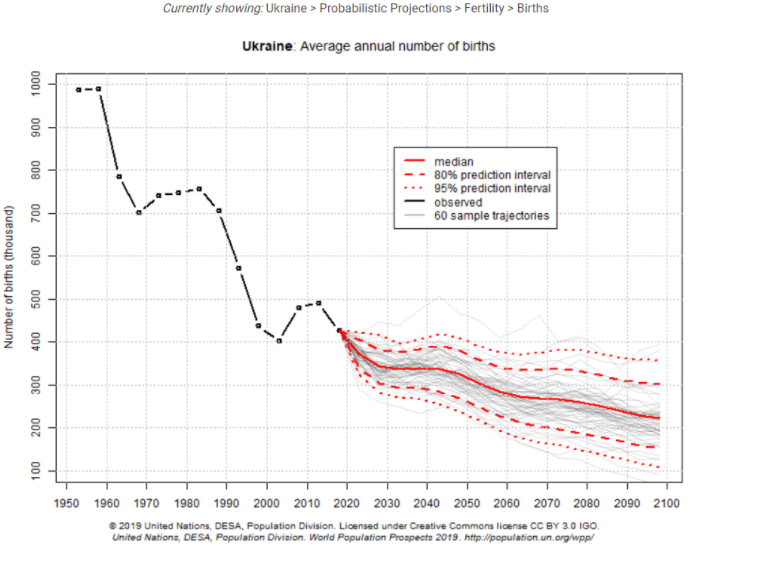

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [189]:
result=seasonal_decompose(y, model='additive', period=16)
result

<AxesSubplot:>

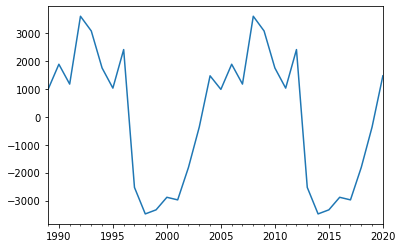

In [190]:
result.seasonal.plot()

<AxesSubplot:>

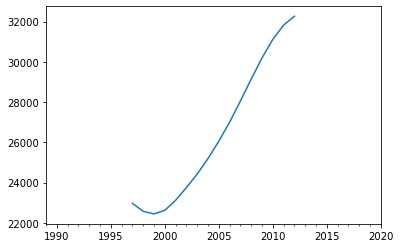

In [191]:
result.trend.plot()

<AxesSubplot:>

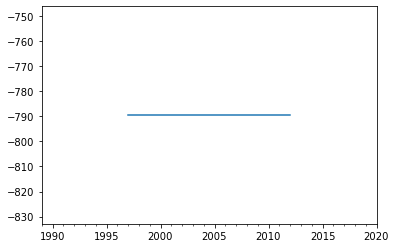

In [192]:
result.resid.plot()